# Import Libraries:

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Data

In [2]:
cars_train = pd.read_csv("c:Desktop/Cars93.csv")

In [3]:
cars_train.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
cars_train.columns = ['id', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

In [5]:
cars_train = cars_train.drop(labels=["id","Make","Model"],axis=1)

In [6]:
cars_train.shape      #columns with uncessary data are drop

(93, 25)

In [7]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      93 non-null     object 
 1   Type              93 non-null     object 
 2   MinPrice          93 non-null     float64
 3   Price             93 non-null     float64
 4   MaxPrice          93 non-null     float64
 5   MPGcity           93 non-null     int64  
 6   MPGhighway        93 non-null     int64  
 7   AirBags           89 non-null     object 
 8   DriveTrain        93 non-null     object 
 9   Cylinders         93 non-null     object 
 10  EngineSize        93 non-null     float64
 11  Horsepower        93 non-null     int64  
 12  RPM               93 non-null     int64  
 13  Revpermile        93 non-null     int64  
 14  Mantransavail     93 non-null     object 
 15  Fueltankcapacity  93 non-null     float64
 16  Passengers        93 non-null     int64  
 17 

In [8]:
cars_train.describe()

,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


# Missing Data Treatment

In [9]:
cars_train.isna().sum()

Manufacturer         0
Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGcity              0
MPGhighway           0
AirBags              4
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
Revpermile           0
Mantransavail        0
Fueltankcapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
Turncircle           0
Rearseatroom         2
Luggageroom         11
Weight               0
Origin               0
dtype: int64

In [10]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
                x = df[i].mean()
                df[i] = df[i].fillna(x)

In [11]:
replacer(cars_train)

In [12]:
cars_train.isna().sum()  #missing values treated

Manufacturer        0
Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGcity             0
MPGhighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
Revpermile          0
Mantransavail       0
Fueltankcapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
Turncircle          0
Rearseatroom        0
Luggageroom         0
Weight              0
Origin              0
dtype: int64

# Exploratory Data Analysis:

In [13]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
     
    for i in df[con]:
        sb.boxplot(df[i],color = "y")
        plt.show()
        
        sb.distplot(df[i],color = "b")
        plt.show()
        
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl")
        plt.show()
            

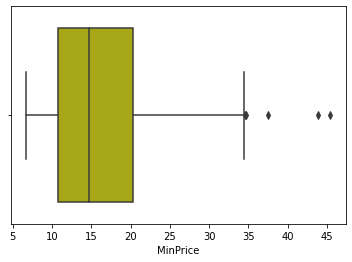

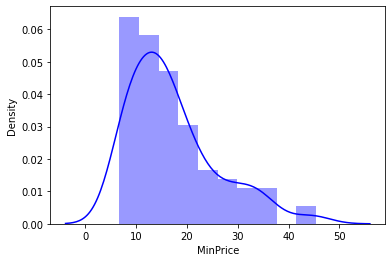

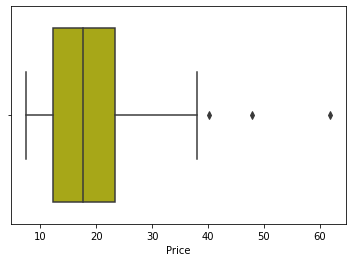

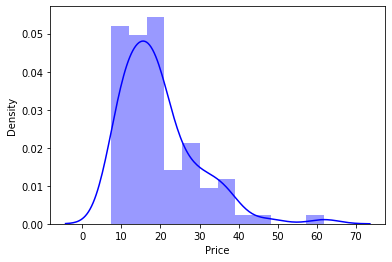

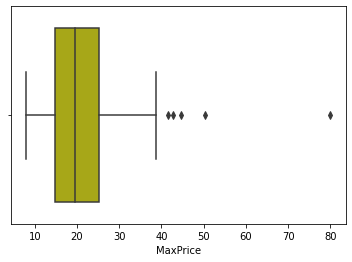

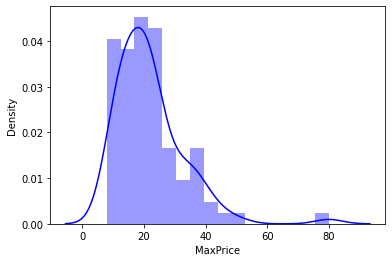

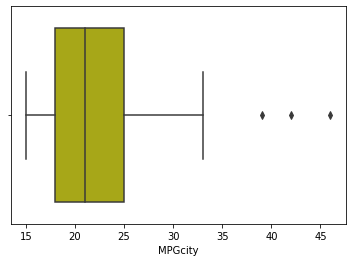

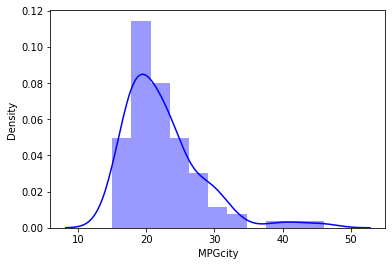

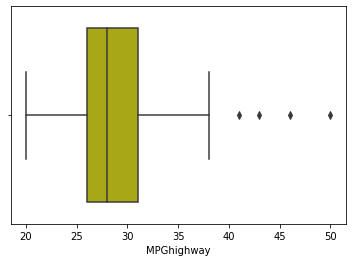

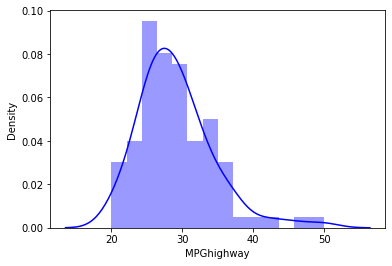

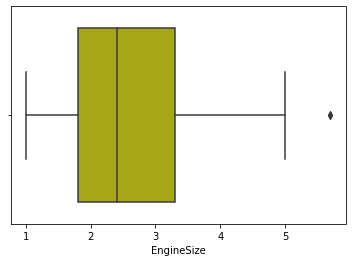

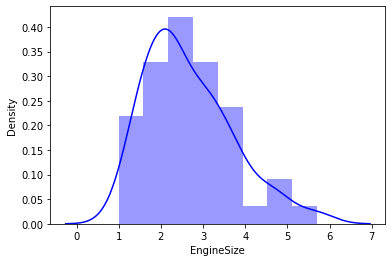

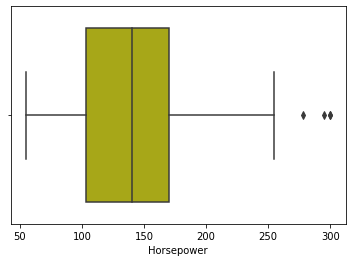

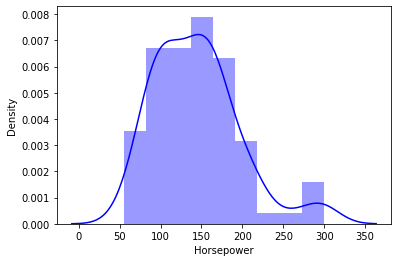

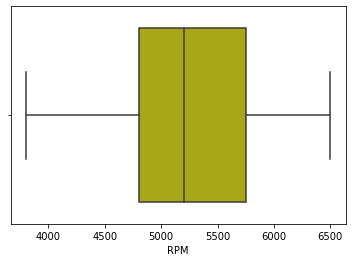

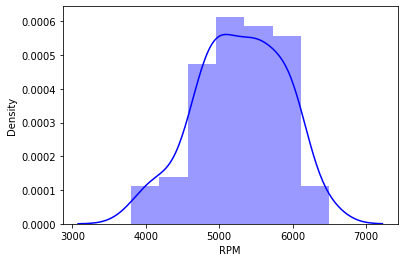

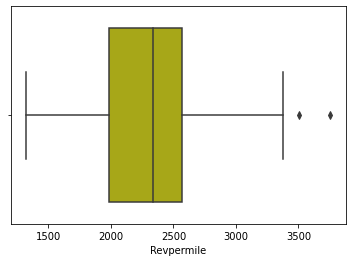

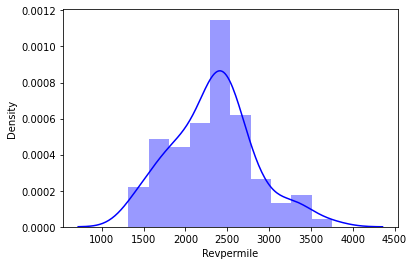

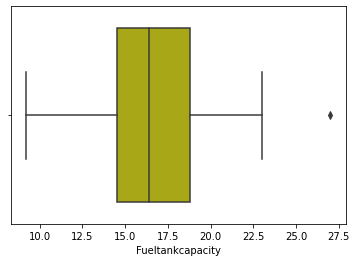

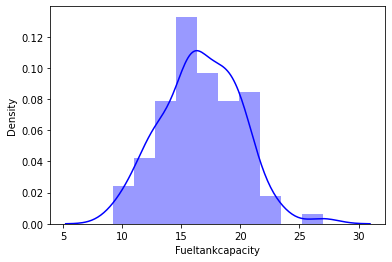

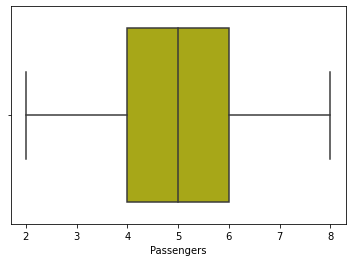

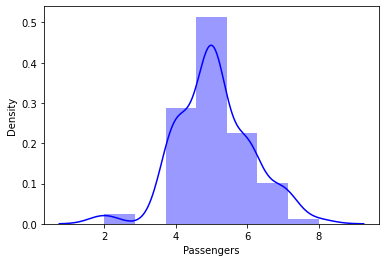

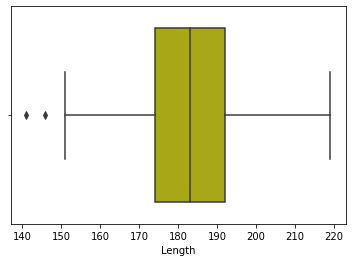

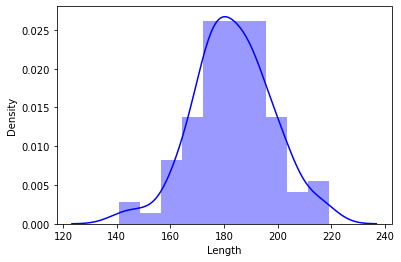

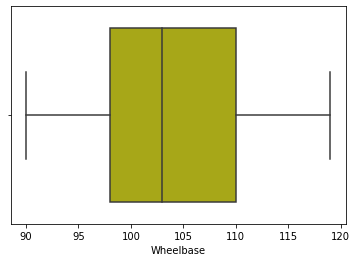

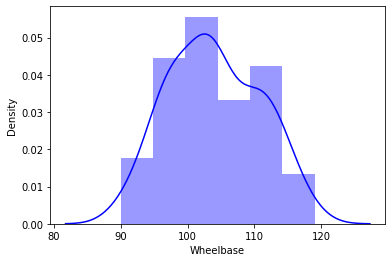

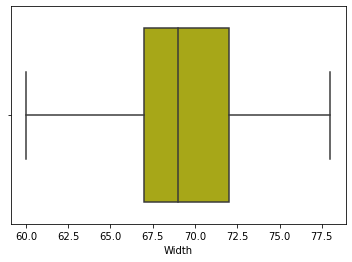

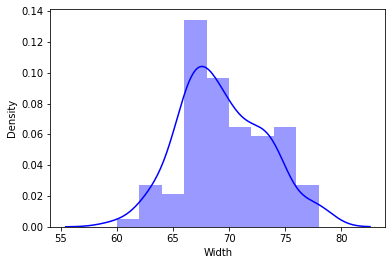

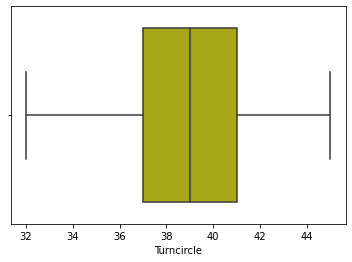

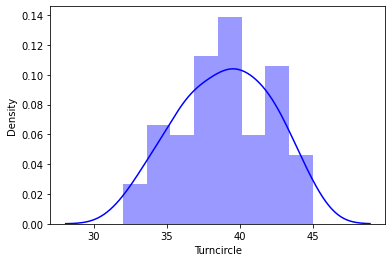

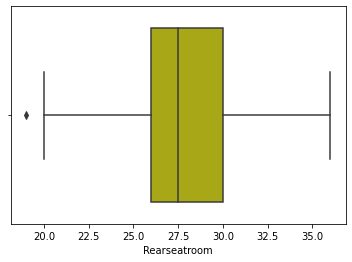

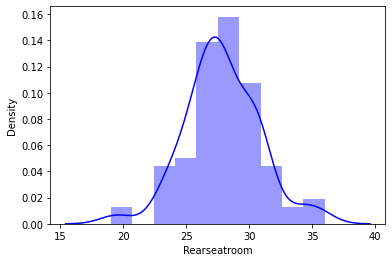

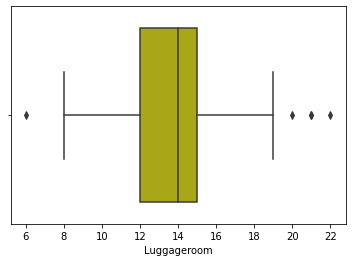

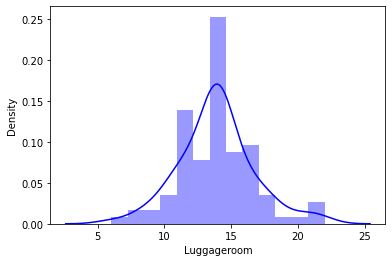

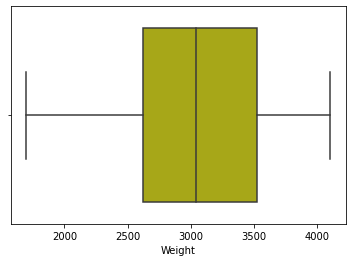

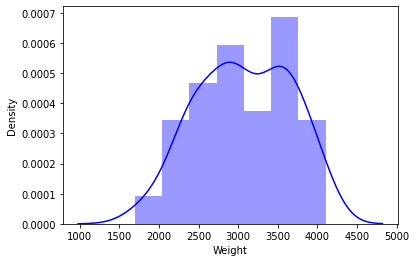

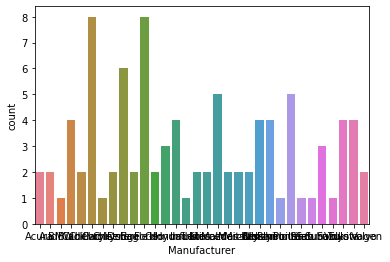

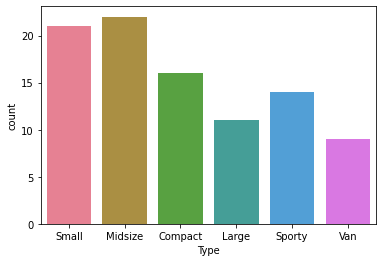

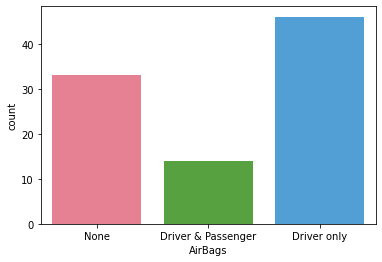

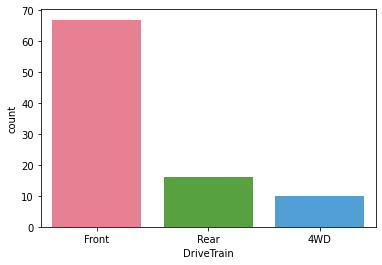

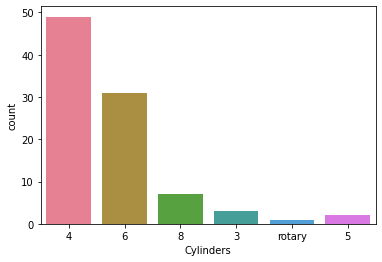

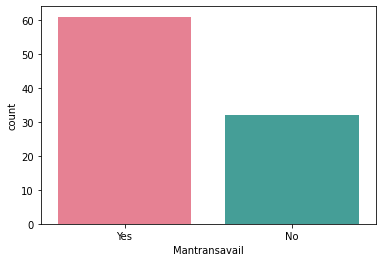

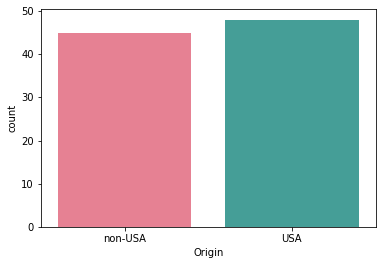

In [14]:
EDA(cars_train)

# Statistical Analysis using ANOVA & Chi-Square test

In [15]:
cat = []
con = []
for i in cars_train.columns:
    if(cars_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)


In [16]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [17]:
imp_cols = []
for i in cars_train.columns:
    if(cars_train[i].dtypes!="object"):
        x = ANOVA(cars_train,"Type",i)
        if(x < 0.05):
            print("Type vs ",i,"-->",x)
            imp_cols.append(i)

Type vs  MinPrice --> 0.0
Type vs  Price --> 0.0
Type vs  MaxPrice --> 0.0
Type vs  MPGcity --> 0.0
Type vs  MPGhighway --> 0.0
Type vs  EngineSize --> 0.0
Type vs  Horsepower --> 0.0
Type vs  RPM --> 0.0
Type vs  Revpermile --> 0.0
Type vs  Fueltankcapacity --> 0.0
Type vs  Passengers --> 0.0
Type vs  Length --> 0.0
Type vs  Wheelbase --> 0.0
Type vs  Width --> 0.0
Type vs  Turncircle --> 0.0
Type vs  Rearseatroom --> 0.0
Type vs  Luggageroom --> 0.0
Type vs  Weight --> 0.0


In [18]:
imp_cols

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight']

In [19]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd 
    ct = pd.crosstab(cars_train[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return  b

In [20]:
for i in cars_train.columns:
    if(cars_train[i].dtypes == "object"):
        x = chisquare(cars_train,"Type",i)
        if(x < 0.05):
            print("Type  vs ",i,"---->",x)
            imp_cols.append(i)

Type  vs  Type ----> 1.336911367007792e-82
Type  vs  AirBags ----> 0.00022621310210534361
Type  vs  DriveTrain ----> 0.00012480179759447616
Type  vs  Cylinders ----> 1.674244316924938e-07
Type  vs  Mantransavail ----> 3.661469229213669e-10
Type  vs  Origin ----> 0.015110051037674484


In [21]:
imp_cols.remove("Type")

In [44]:
#Exploratory Data Analysis

In [22]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
     
    for i in df[con]:
        sb.boxplot(df[i],color = "g")
        plt.show()
        
        sb.distplot(df[i],color = "b")
        plt.show()
        
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl",hue=cars_train.Type)
        plt.show()
            

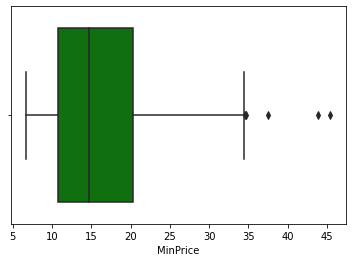

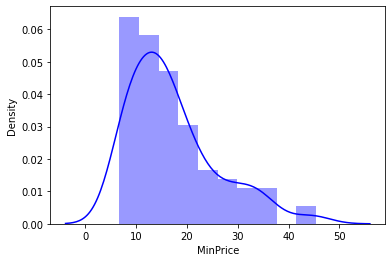

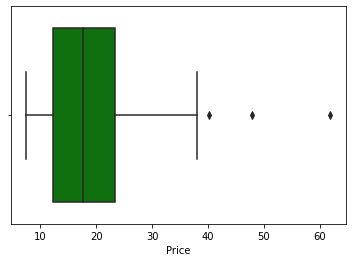

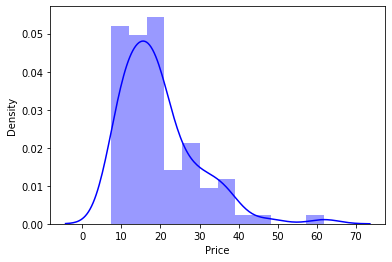

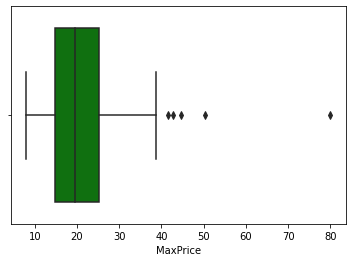

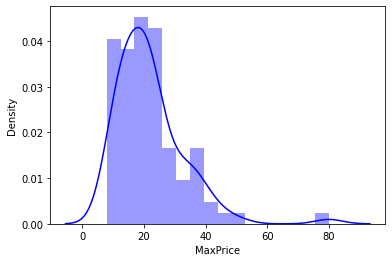

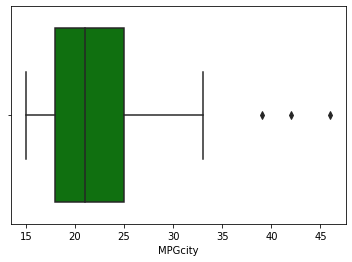

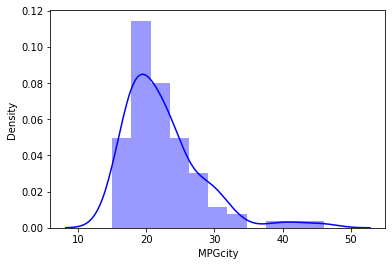

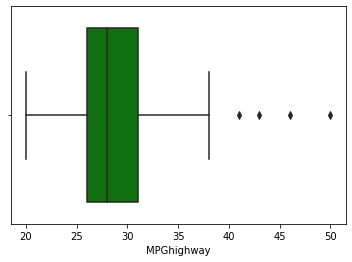

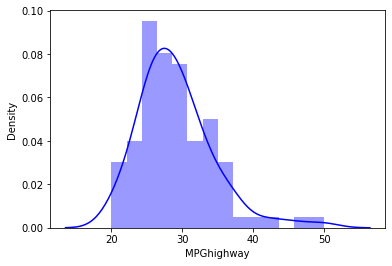

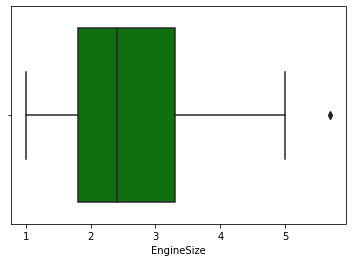

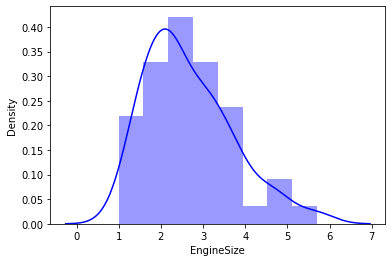

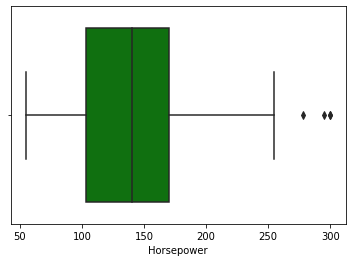

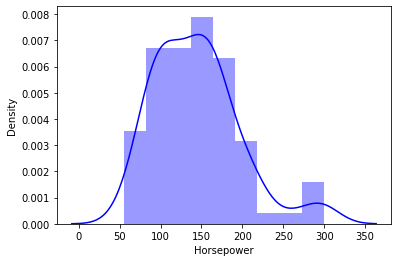

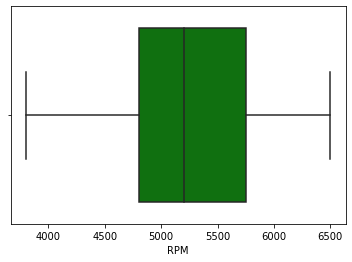

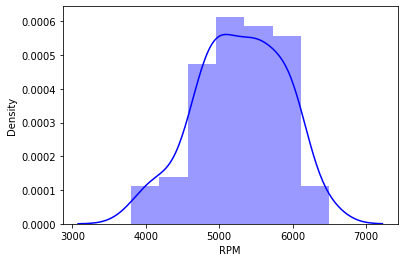

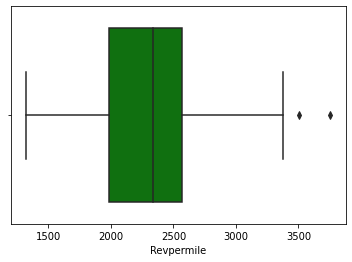

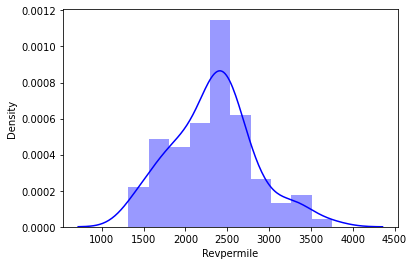

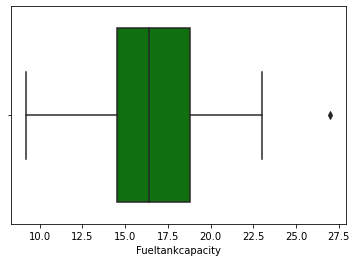

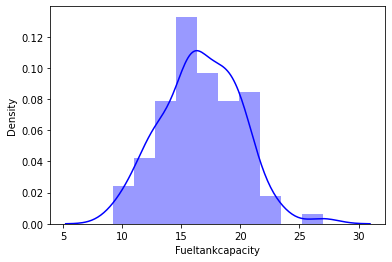

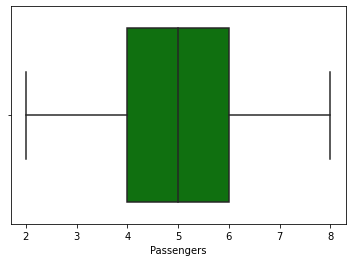

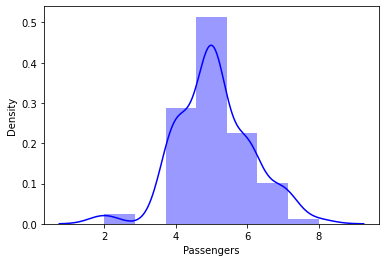

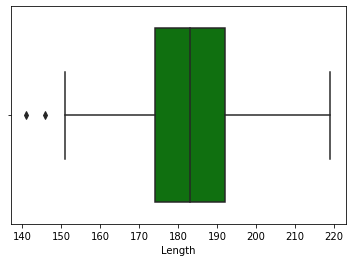

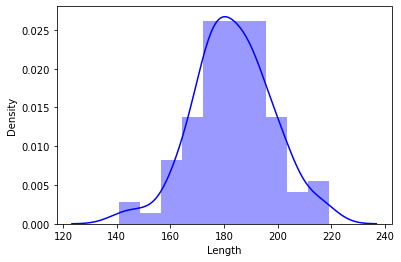

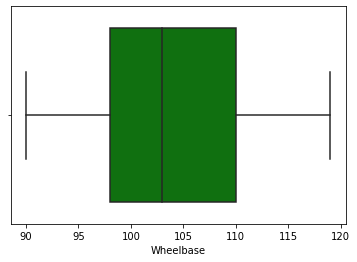

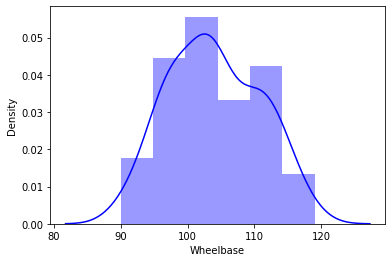

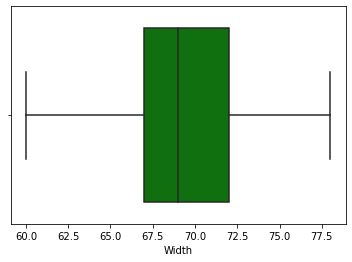

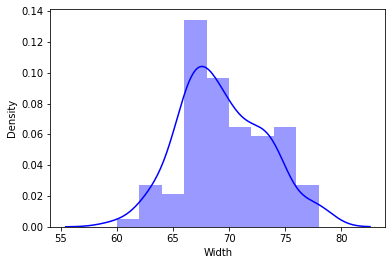

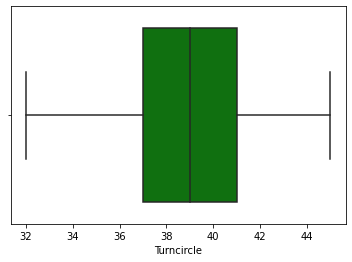

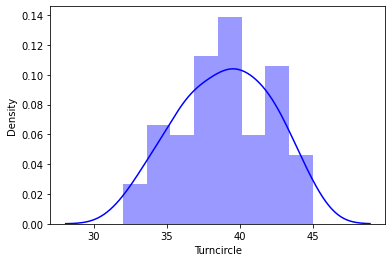

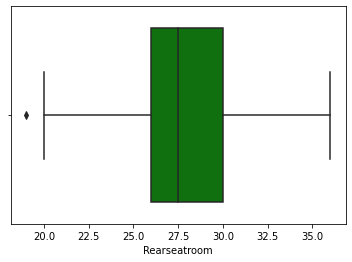

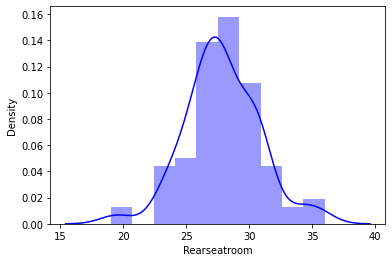

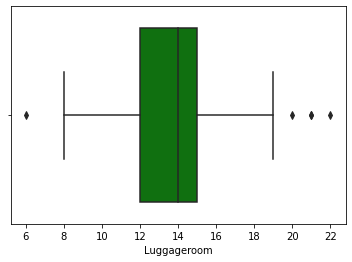

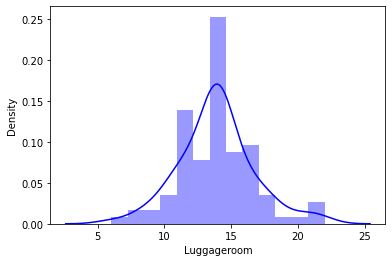

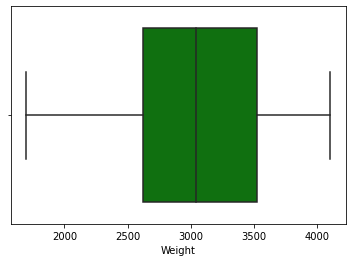

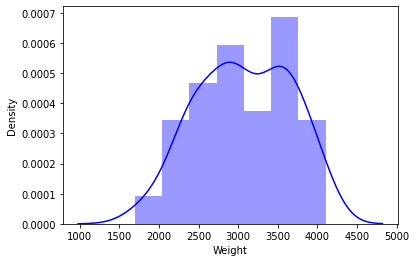

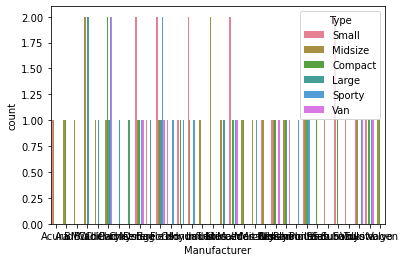

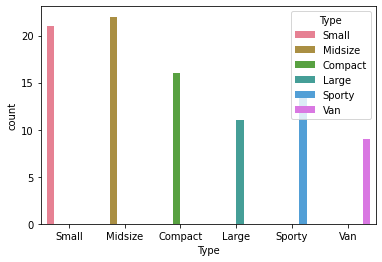

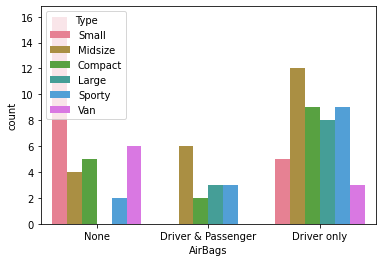

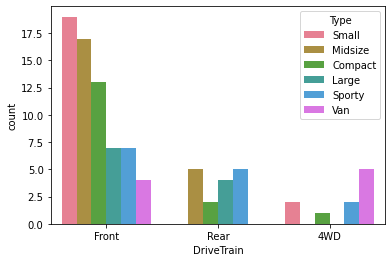

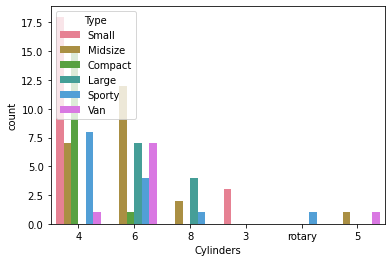

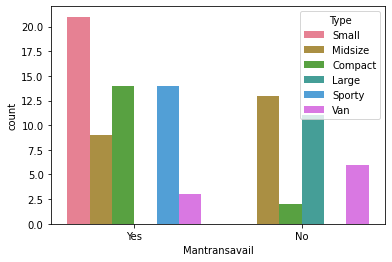

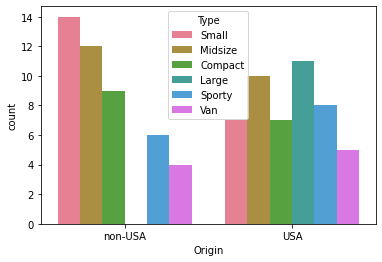

In [23]:
EDA(cars_train)

In [24]:
print("From EDA we see that there are some outliers present,dropping them improve skew in data also")

From EDA we see that there are some outliers present,dropping them improve skew in data also


# Define X and Y

In [25]:
Y = cars_train[["Type"]]
X = cars_train.drop(["Type"],axis=1)

In [26]:
X.head()

,Manufacturer,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,...,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin
0,Acura,12.9,15.9,18.8,25,31,None,Front,4,1.8,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,30.8,37.7,44.6,19,26,Driver only,Front,6,2.8,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      93 non-null     object 
 1   MinPrice          93 non-null     float64
 2   Price             93 non-null     float64
 3   MaxPrice          93 non-null     float64
 4   MPGcity           93 non-null     int64  
 5   MPGhighway        93 non-null     int64  
 6   AirBags           93 non-null     object 
 7   DriveTrain        93 non-null     object 
 8   Cylinders         93 non-null     object 
 9   EngineSize        93 non-null     float64
 10  Horsepower        93 non-null     int64  
 11  RPM               93 non-null     int64  
 12  Revpermile        93 non-null     int64  
 13  Mantransavail     93 non-null     object 
 14  Fueltankcapacity  93 non-null     float64
 15  Passengers        93 non-null     int64  
 16  Length            93 non-null     int64  
 17 

In [28]:
X.columns

Index(['Manufacturer', 'MinPrice', 'Price', 'MaxPrice', 'MPGcity',
       'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Revpermile', 'Mantransavail', 'Fueltankcapacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turncircle',
       'Rearseatroom', 'Luggageroom', 'Weight', 'Origin'],
      dtype='object')

# Data Pre-processing

In [29]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [30]:
Xnew = preprocessing(X[imp_cols])

# Outlier Treament

In [31]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [32]:
outliers(Xnew)

[16, 38, 41, 47, 58, 59]

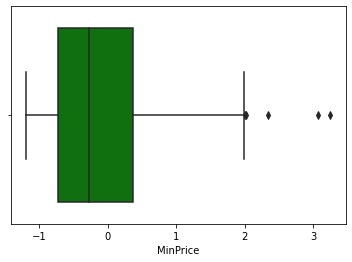

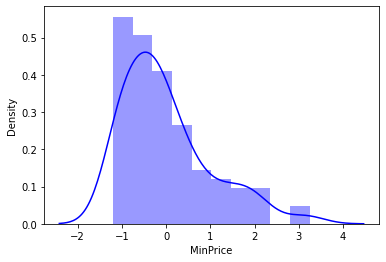

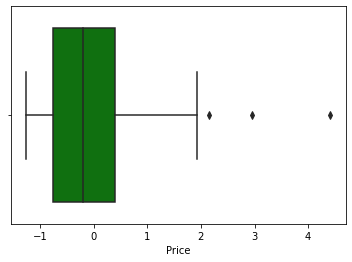

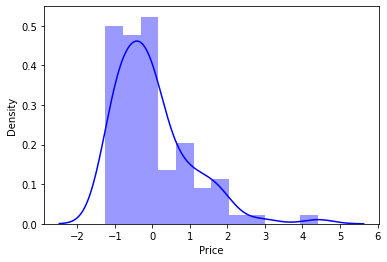

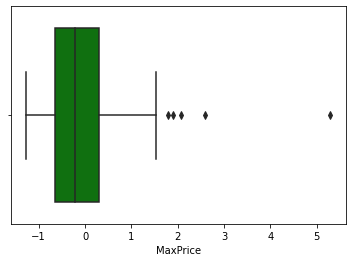

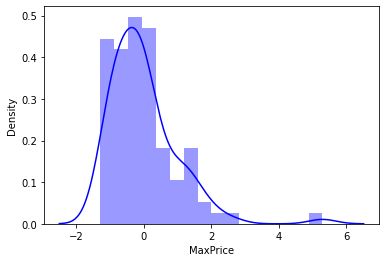

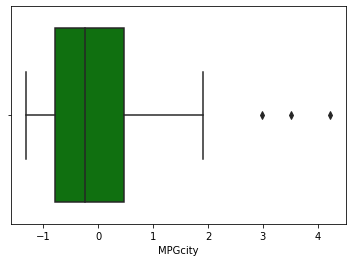

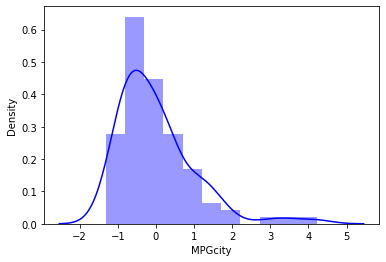

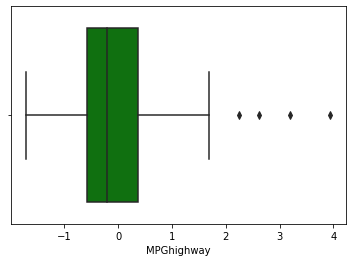

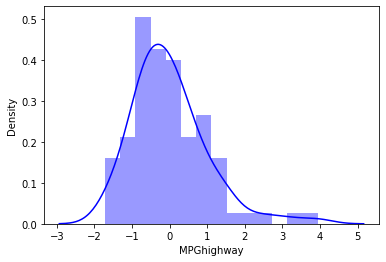

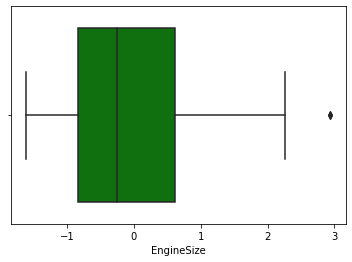

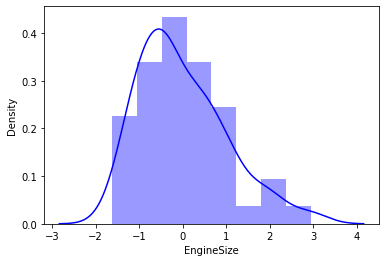

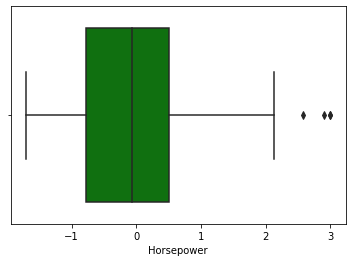

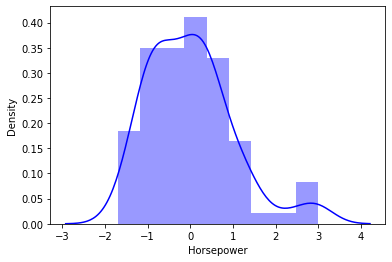

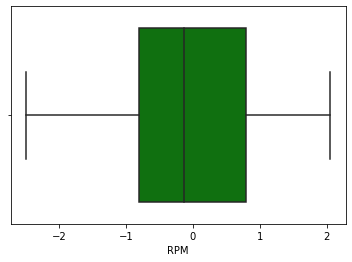

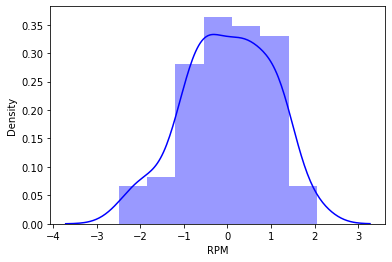

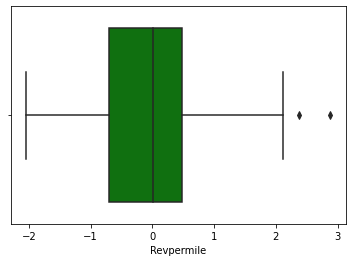

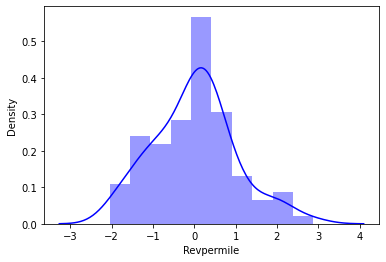

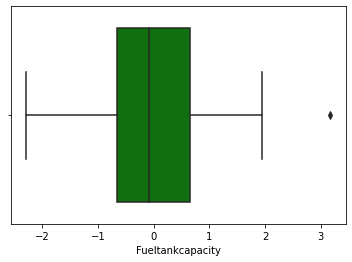

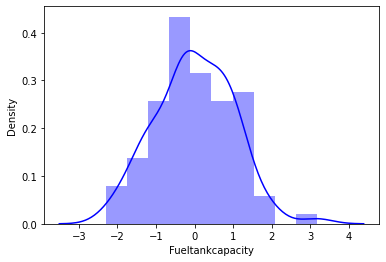

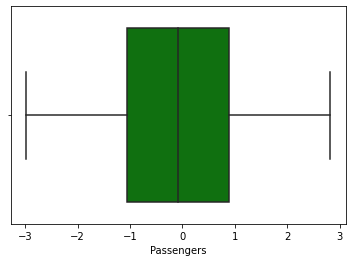

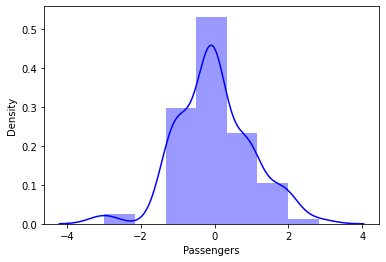

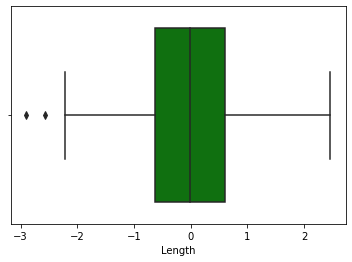

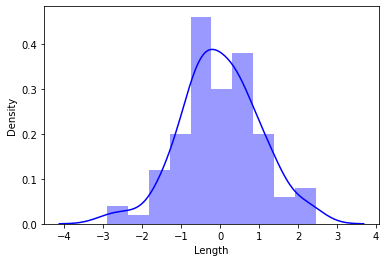

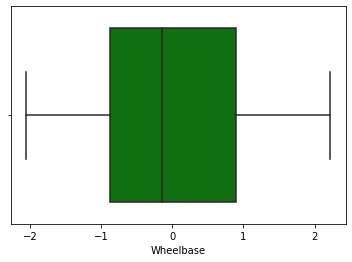

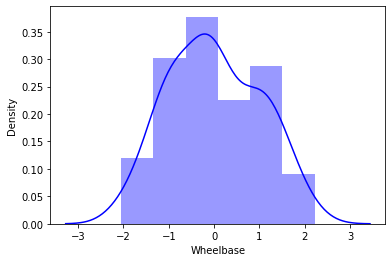

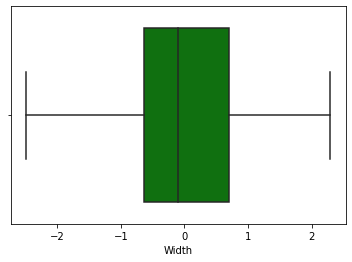

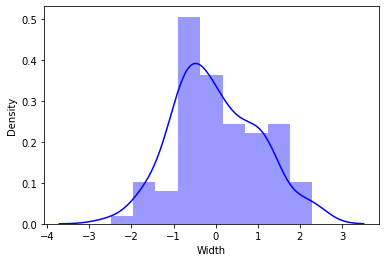

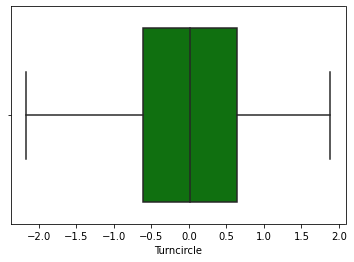

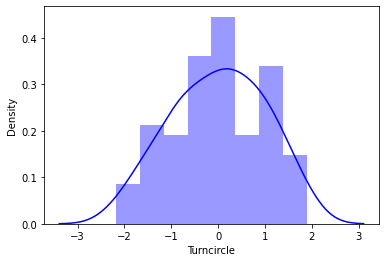

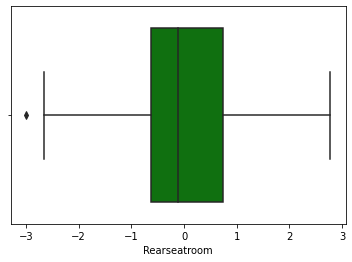

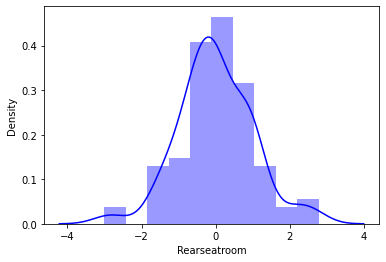

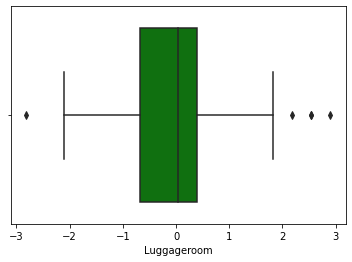

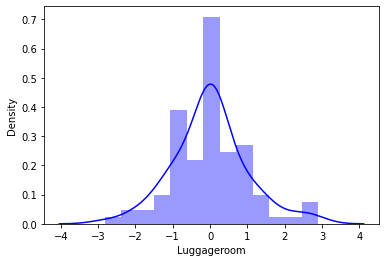

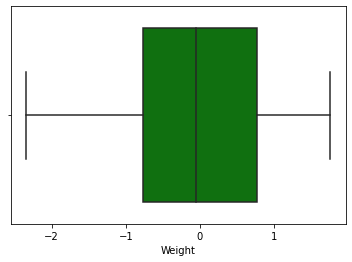

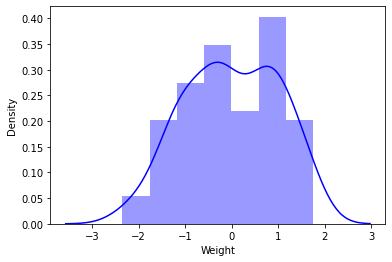

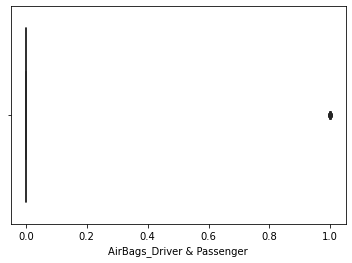

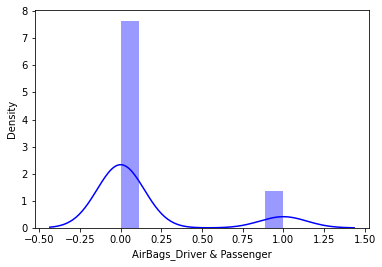

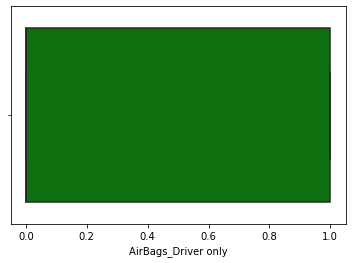

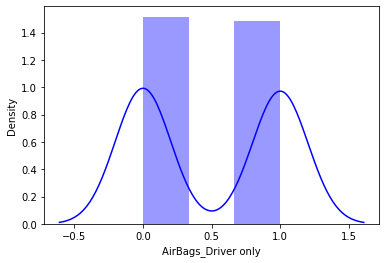

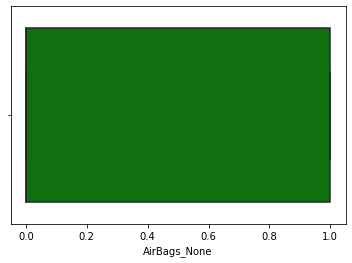

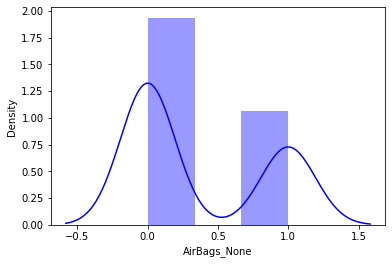

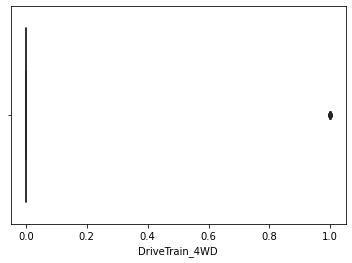

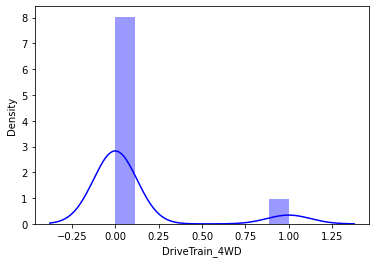

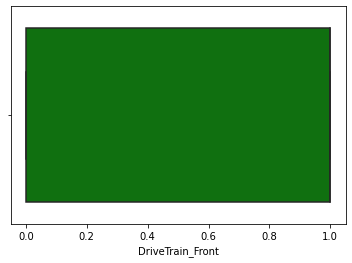

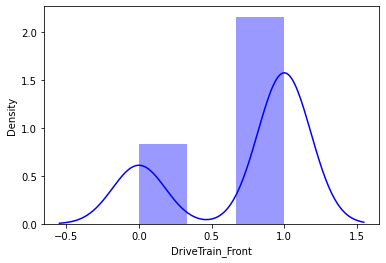

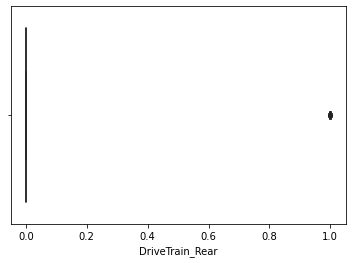

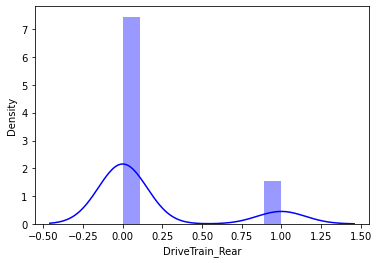

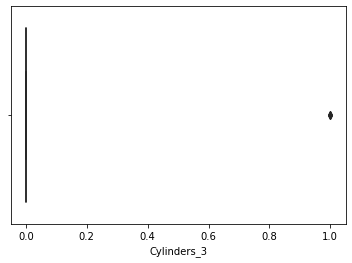

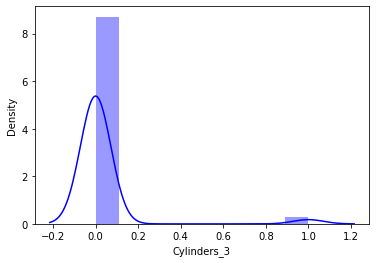

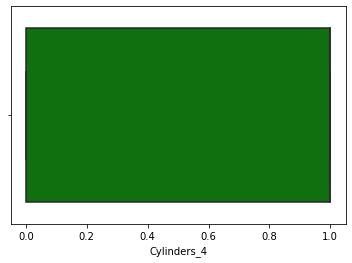

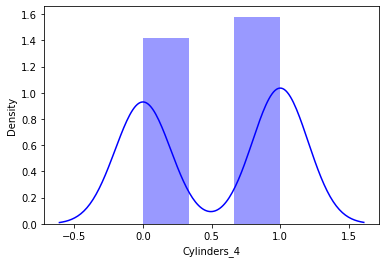

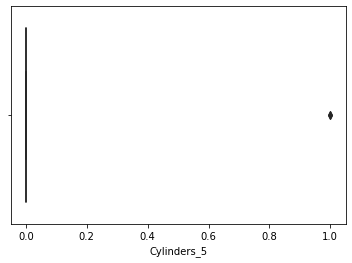

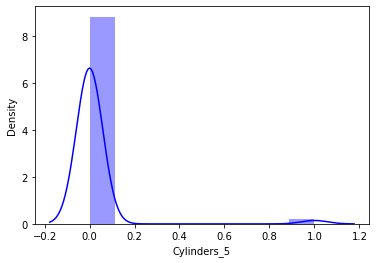

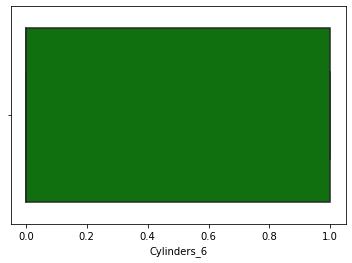

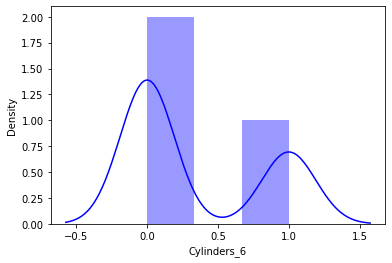

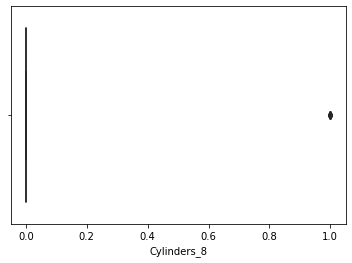

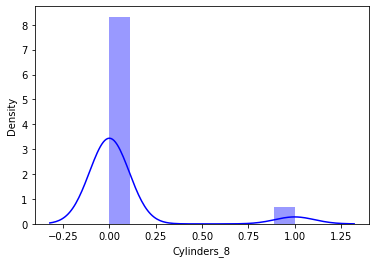

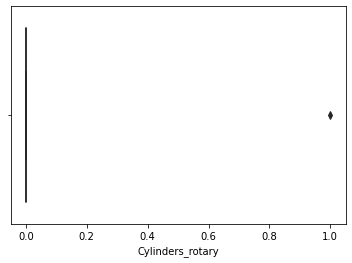

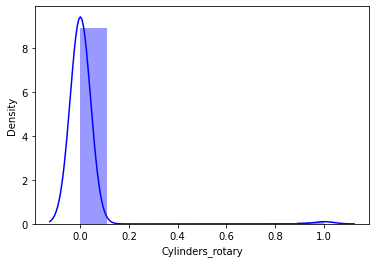

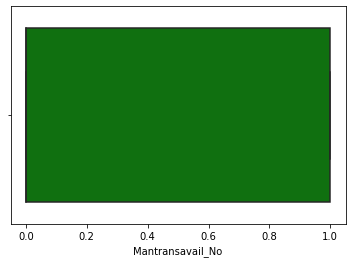

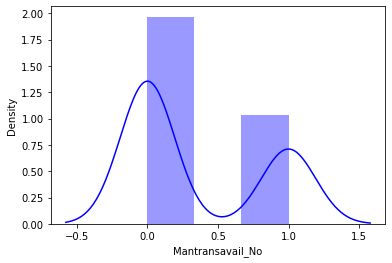

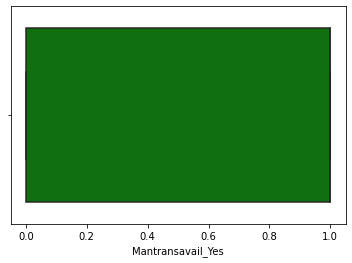

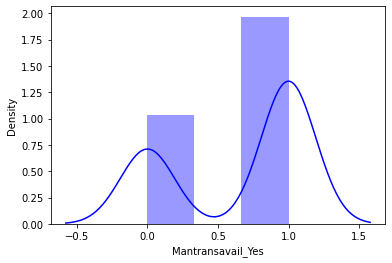

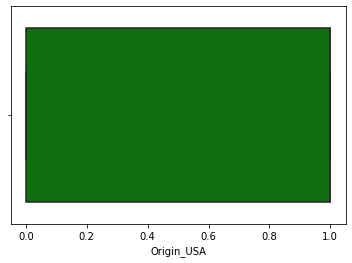

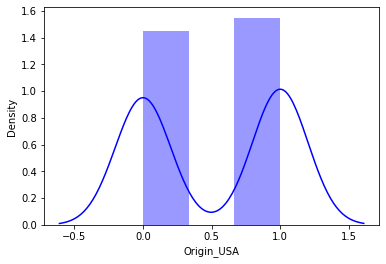

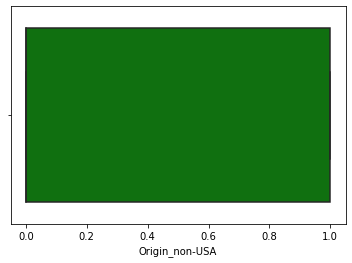

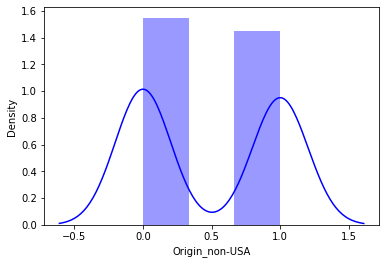

In [33]:
EDA(Xnew)

# Create Logistic Regression Model

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

In [36]:
pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

# Find training and testing accuracy score

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [38]:
tr_acc

1.0

In [39]:
ts_acc

0.9473684210526315

In [40]:
confusion_matrix(ytrain,pred_tr)

array([[15,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

In [41]:
confusion_matrix(ytest,pred_ts)

array([[1, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0],
       [1, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [42]:
ytest["test_pred"] = pred_ts

In [43]:
ytest

,Type,test_pred
23,Small,Compact
86,Van,Van
91,Compact,Compact
21,Large,Large
17,Large,Large
82,Small,Small
34,Sporty,Sporty
27,Sporty,Sporty
10,Midsize,Midsize
40,Sporty,Sporty
